In [0]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

  
  # Convolutional Neural Networks for classifying handwritten digits using MNIST dataset
  
  * @Author: Sameer Kesava
                  * 2 Convolutional Layers    
                  * 2 Fully Connected Layers    
                  * Dropout for model robustness    
                  * Cross Entropy Loss function    
                  * Adam Optimizer    
                  * Batch size: 32
                  * Epochs: 40
                  * Test data accuracy: 92.67%

## Loading Fashion-MNIST dataset

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
# Loading the dataset
dataset = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Exploratory Data Analysis

In [0]:
type(dataset)

tuple

In [0]:
len(dataset)

2

In [0]:
len(dataset[0])

2

In [0]:
len(dataset[1])

2

In [0]:
y = dataset[1]

In [0]:
type(y)

tuple

In [0]:
y[0].shape

(10000, 28, 28)

In [0]:
len(y)

2

In [0]:
y[1].shape

(10000,)

In [0]:
x = dataset[0]
type(x)

tuple

In [0]:
len(x)

2

In [0]:
x[0].shape

(60000, 28, 28)

In [0]:
x[1].shape

(60000,)

#### Creating training and test datasets

In [0]:
x_train = x[0].copy()
y_train = x[1].copy()
del x

In [0]:
x_test = y[0].copy()
y_test = y[1].copy()
del y

In [0]:
import numpy as np

In [0]:
# Checking the number of labels
y_unique = np.unique(y_train)
y_unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
# Checking the maximum pixel value
max_pix_value =  np.max(x_train)
max_pix_value

255

In [0]:
# Checking the minimum pixel value

min_pix_value =  np.min(x_train)
min_pix_value

0

In [0]:
# Plotting
import matplotlib.pyplot as plt

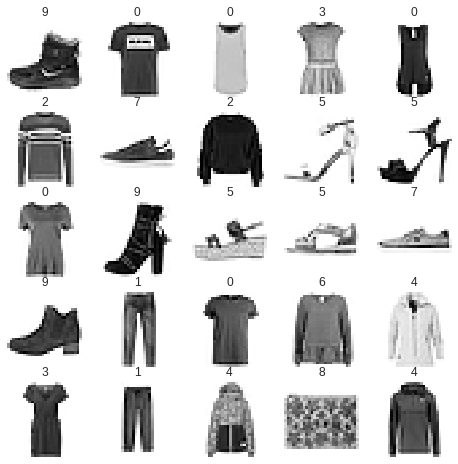

In [0]:
fig1, ax1 = plt.subplots(nrows = 5, ncols=5, figsize = (8,8))
ax1 = ax1.flatten()

for i, ax in enumerate(ax1):
    ax.imshow(x_train[i])
    ax.set_title(y_train[i])
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

## Data Preprocessing

In [0]:
x_train_scaled = x_train.reshape(-1, x_train.shape[1]*x_train.shape[2])
x_train_scaled.shape

(60000, 784)

In [0]:
x_test_scaled = x_test.reshape(-1, x_test.shape[1]*x_test.shape[2])
x_test_scaled.shape

(10000, 784)

In [0]:
mean_pixel = np.mean(x_train_scaled, axis = 0)

In [0]:
len(mean_pixel)

784

In [0]:
stddev_pixel = np.std(x_train_scaled)
stddev_pixel

90.02118235130519

In [0]:
x_train_scaled = (x_train_scaled - mean_pixel)/stddev_pixel
print('Min and Max values of scaled pixels: %0.2f and %0.2f' %(np.min(x_train_scaled), np.max(x_train_scaled)))

Min and Max values of scaled pixels: -1.80 and 2.83


In [0]:
x_test_scaled = (x_test_scaled - mean_pixel)/stddev_pixel
print('Min and Max values of scaled pixels: %0.2f and %0.2f' %(np.min(x_test_scaled), np.max(x_test_scaled)))

Min and Max values of scaled pixels: -1.80 and 2.83


In [0]:
x_train_scaled = x_train_scaled.reshape(-1, 28, 28, 1)
x_test_scaled = x_test_scaled.reshape(-1, 28, 28,1)

## Building CNN

#### Convolutional Layer

In [0]:
import tensorflow as tf

In [0]:
def conv_layer(input_tensor, kernel = (5,5), padding = 'SAME', strides = (1,1,1,1), output_features = 64, name = 'layer'):
    
    """ Building a convolutional layer with a variable scope"""
    
    # input_tensor: batch_size x rows x columns x channels
    
    with tf.variable_scope(name_or_scope=name):
        nchannels = input_tensor.get_shape().as_list()[-1]
        
        kshape = list(kernel) + [nchannels, output_features]
        
        kweights = tf.get_variable(name = '_weights', shape = kshape)
        print(kweights)
        # default initializer is the Glorot initializer
        
        kbiases = tf.get_variable(name = '_biases', initializer=tf.zeros(shape = [output_features]))
        print(kbiases)
        
        conv = tf.nn.conv2d(input = input_tensor, filter = kweights, strides = strides, padding=padding, 
                            data_format='NHWC', name = 'conv')
        print(conv)
        
        conv = tf.nn.bias_add(conv, kbiases, name = 'bias_add')
        print(conv)
        
        conv = tf.nn.relu(conv, name = 'activation')
        print(conv)
        
        return conv  


In [0]:
# Testing the CN layer
g = tf.Graph()
with g.as_default():
    x = tf.placeholder(tf.float32, shape = [None,28,28,1], name='tf_x')
    print('Shape of tensor x is', x.get_shape().as_list()[1:], 'and length is', len(x.get_shape().as_list()))
    print('Shape of the flattened tensor', np.prod(x.get_shape().as_list()[1:]))
    y = tf.placeholder(tf.float32, shape = [1,28,28,1], name='tf_y')
    z = tf.placeholder(tf.float32, shape = [1,28,28,1], name='tf_z')
    conv_layer(input_tensor=x, padding='SAME', name = 'x')
    print('\n')
    conv_layer(input_tensor=y, padding='VALID', name = 'y')
    # conv_layer(input_tensor=z, padding='FULL', name = 'z') 
    # No FULL padding

    
del g, x,y

('Shape of tensor x is', [28, 28, 1], 'and length is', 4)
('Shape of the flattened tensor', 784)
Instructions for updating:
Colocations handled automatically by placer.
<tf.Variable 'x/_weights:0' shape=(5, 5, 1, 64) dtype=float32_ref>
<tf.Variable 'x/_biases:0' shape=(64,) dtype=float32_ref>
Tensor("x/conv:0", shape=(?, 28, 28, 64), dtype=float32)
Tensor("x/bias_add:0", shape=(?, 28, 28, 64), dtype=float32)
Tensor("x/activation:0", shape=(?, 28, 28, 64), dtype=float32)


<tf.Variable 'y/_weights:0' shape=(5, 5, 1, 64) dtype=float32_ref>
<tf.Variable 'y/_biases:0' shape=(64,) dtype=float32_ref>
Tensor("y/conv:0", shape=(1, 24, 24, 64), dtype=float32)
Tensor("y/bias_add:0", shape=(1, 24, 24, 64), dtype=float32)
Tensor("y/activation:0", shape=(1, 24, 24, 64), dtype=float32)


#### Pooling Layer

In [0]:
def pooling(input_tensor, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME'):
    """Non-overlapping pooling. Hence the stride is [2,2]"""
    return tf.nn.avg_pool(input_tensor, ksize=ksize, strides = strides, padding=padding)

#### Dense Layer

In [0]:
def dense_layer(input_tensor, output_units = 1024, name = 'dense_layer', activation_fn = None):
    
    """Building densely connected layer with a variable scope"""
    with tf.variable_scope(name_or_scope=name):
        
        # Need to check if the layer is flattened
        input_shape = input_tensor.get_shape().as_list()[1:] # shape without the batch size
        
        if len(input_shape)>1:
            input_tensor = tf.reshape(input_tensor, shape = (-1, np.prod(input_shape)), name = 'flattened_ts')
            input_shape = input_tensor.get_shape().as_list()[1:]
        
        
        dweights = tf.get_variable(name = '_weights', shape = input_shape + [output_units])
        # default initializer is glorot initializer
        print(dweights)
        
        dbias =  tf.get_variable(name = '_biases', initializer=tf.zeros(shape = [output_units]))
        print(dbias)
        
        
        dense_conn = tf.matmul(input_tensor, dweights, name ='dense_conn')
        print(dense_conn)
        
        dense_conn = tf.nn.bias_add(dense_conn, dbias, name = 'bias_add')
        print(dense_conn)
        
        if activation_fn is None:
            return dense_conn
        
        dense_conn =  activation_fn(dense_conn, name = 'activation')
        print(dense_conn)        
        
        return dense_conn

In [0]:
# Testing the dense layer
g = tf.Graph()
with g.as_default():
    
    x = tf.placeholder(tf.float32, shape = [None,28,28,1], name='tf_x')
    print('Shape of tensor x is', x.get_shape().as_list()[1:], 'and length is', len(x.get_shape().as_list()))
    print('Shape of the flattened tensor', np.prod(x.get_shape().as_list()[1:]))
    
    y = tf.placeholder(tf.float32, shape = [1,50], name='tf_y')
    
    dense_layer(input_tensor=x, output_units=1000, name = 'x')
    print('\n')
    
    dense_layer(input_tensor=y, output_units=10, name = 'y', activation_fn=tf.nn.relu6)
    # conv_layer(input_tensor=z, padding='FULL', name = 'z') 
    # No FULL padding

    
del g, x,y

('Shape of tensor x is', [28, 28, 1], 'and length is', 4)
('Shape of the flattened tensor', 784)
<tf.Variable 'x/_weights:0' shape=(784, 1000) dtype=float32_ref>
<tf.Variable 'x/_biases:0' shape=(1000,) dtype=float32_ref>
Tensor("x/dense_conn:0", shape=(?, 1000), dtype=float32)
Tensor("x/bias_add:0", shape=(?, 1000), dtype=float32)


<tf.Variable 'y/_weights:0' shape=(50, 10) dtype=float32_ref>
<tf.Variable 'y/_biases:0' shape=(10,) dtype=float32_ref>
Tensor("y/dense_conn:0", shape=(1, 10), dtype=float32)
Tensor("y/bias_add:0", shape=(1, 10), dtype=float32)
Tensor("y/activation:0", shape=(1, 10), dtype=float32)


#### Building the Neural Network

In [0]:
def build_cnn(learning_rate = 1e-4):
    
    
    # Placeholders for feeding training data
    x_data = tf.placeholder(dtype = tf.float32, shape = [None, 28,28,1], name = 'tensor_x')
    y_data = tf.placeholder(dtype = tf.uint8, shape = [None], name = 'tensor_y')
    
    # One hot encoding of y
    y_onehot =  tf.one_hot(indices=y_data, depth = len(y_unique), axis = -1, dtype = tf.float32,
                           name = 'tensor_onehoty')
    
    print('\nFirst convolution layer: ')
    conv1 = conv_layer(input_tensor=x_data, kernel = (3,3), padding = 'SAME', 
                       strides = (1,1,1,1), output_features=64, name = 'conv1')
    
    pool1 =  pooling(input_tensor=conv1)
    
    print('\nSecond convolution layer: ')
    conv2 = conv_layer(input_tensor=pool1, kernel = (5,5), padding = 'VALID', 
                       strides = (1,1,1,1), output_features=128, name = 'conv2')
    
    pool2 = pooling(input_tensor=conv2)
    
    print('\nFirst dense layer: ')
    dense1 = dense_layer(input_tensor=pool2, output_units=1024, name = 'dense1', activation_fn=tf.nn.relu)
    
    keep_prob = tf.placeholder(dtype=tf.float32, shape = [], name='keep_prob')
    dense1_drop = tf.nn.dropout(dense1, keep_prob=keep_prob, name = 'dense1_dropout' )
    
    print('\nSecond dense layer leading to predictions: ')
    dense2 = dense_layer(input_tensor=dense1_drop, output_units=len(y_unique), name = 'dense2', activation_fn=None)
    
    
    pred_probabilities = tf.nn.softmax(dense2, name='pred_probabilities')
    # softmax probabilities of the predicted output labels
    print(pred_probabilities)
                  
    pred_labels = tf.cast(tf.argmax(dense2, axis=1), dtype = tf.uint8, name = 'pred_labels')
    # predicted labels, cast into tf.uint8. Need to be of the same datatype as the training labels for comparison
    print(pred_labels)
    
    
    # Defining loss function. reduce_mean for the batch.
    loss_func = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_onehot, logits = dense2),
                               name = 'cross_entropy_loss')
    print(loss_func)
    
    # Creating an optimizer object
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    optimizer = optimizer.minimize(loss_func, name = 'training')
    print(optimizer)
    
    
    correct_predictions =  tf.equal(pred_labels, y_data, name = 'correct_pred')
    # both need to be of the same datatype. Hence pred_labels has been cast as uint8.
    print(correct_predictions)
    
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32), name = 'accuracy')
    print(accuracy)

##### Testing

In [0]:
g = tf.Graph()
with g.as_default():
    build_cnn()
del g


First convolution layer: 
<tf.Variable 'conv1/_weights:0' shape=(3, 3, 1, 64) dtype=float32_ref>
<tf.Variable 'conv1/_biases:0' shape=(64,) dtype=float32_ref>
Tensor("conv1/conv:0", shape=(?, 28, 28, 64), dtype=float32)
Tensor("conv1/bias_add:0", shape=(?, 28, 28, 64), dtype=float32)
Tensor("conv1/activation:0", shape=(?, 28, 28, 64), dtype=float32)

Second convolution layer: 
<tf.Variable 'conv2/_weights:0' shape=(5, 5, 64, 128) dtype=float32_ref>
<tf.Variable 'conv2/_biases:0' shape=(128,) dtype=float32_ref>
Tensor("conv2/conv:0", shape=(?, 10, 10, 128), dtype=float32)
Tensor("conv2/bias_add:0", shape=(?, 10, 10, 128), dtype=float32)
Tensor("conv2/activation:0", shape=(?, 10, 10, 128), dtype=float32)

First dense layer: 
<tf.Variable 'dense1/_weights:0' shape=(3200, 1024) dtype=float32_ref>
<tf.Variable 'dense1/_biases:0' shape=(1024,) dtype=float32_ref>
Tensor("dense1/dense_conn:0", shape=(?, 1024), dtype=float32)
Tensor("dense1/bias_add:0", shape=(?, 1024), dtype=float32)
Tensor("

##### End Testing

### Function for training the network

In [0]:
def batch_generator(x_data, y_data, shuffle = True, batch_size = 32, random_seed = None):
    
    """ Generator for yielding data as batches
    
    
    data_size = len(y_data)
    idx = np.arange(0, data_size, 1)
    
    # Shuffling
    if shuffle:
        shuffler = np.random.RandomState(seed=random_seed)
        shuffler.shuffle(idx)
        
    x_data = x_data[idx]
    y_data = y_data[idx]
      
    for i in range(0, data_size, batch_size):
        yield x_data[i: i+batch_size], y_data[i: i+batch_size]
    

##### Testing batch generator

In [0]:
for x, y in batch_generator(np.arange(10), np.arange(10,20), batch_size=3):
    print(x, y)

(array([0, 9, 2]), array([10, 19, 12]))
(array([7, 4, 1]), array([17, 14, 11]))
(array([3, 8, 6]), array([13, 18, 16]))
(array([5]), array([15]))


In [0]:
def data_splitter(x_data, y_data, split_ratio = 0.1, shuffle = True, random_seed = None):
    
    """ Function for splitting training data into training
    and validation data at each epoch"""
    
    
    data_size = len(y_data)
    idx = np.arange(data_size)
    
    # Shuffling
    if shuffle:
        shuffler = np.random.RandomState(seed=random_seed)
        shuffler.shuffle(idx)
    
    x_data = x_data[idx]
    y_data = y_data[idx]
    
    rounded_idx = np.rint(split_ratio*data_size).astype(np.int32)
    
    
    return x_data[:rounded_idx], y_data[:rounded_idx], x_data[rounded_idx:], y_data[rounded_idx:]

##### Testing data_splitter

In [0]:
test = np.arange(20)

In [0]:
test

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [0]:
test.astype(np.int8)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int8)

In [0]:
rounded_idx = np.rint(0.33*len(test)).astype(np.int16)
rounded_idx

7

In [0]:
testx = test[: rounded_idx]
testx

array([0, 1, 2, 3, 4, 5, 6])

In [0]:
testy = test[rounded_idx:]
testy

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [0]:
x_1, y_1, x_2, y_2 = data_splitter(np.arange(20), np.arange(20,40), split_ratio=0.33)

In [0]:
x_1

array([19,  5,  4,  1,  6, 14, 18])

In [0]:
y_1

array([39, 25, 24, 21, 26, 34, 38])

In [0]:
x_2

array([17,  2,  7, 12, 16, 15,  3,  0,  9, 10, 11, 13,  8])

In [0]:
y_2

array([37, 22, 27, 32, 36, 35, 23, 20, 29, 30, 31, 33, 28])

##### End Testing

#### Function for training

In [0]:
def train(session, training_data, valid_train_split = 0.1, batch_size = 32, epochs = 20, 
          dropout_prob = 0.5, initialize_var = True, shuffle = True, random_seed = None):
    
    x_data = training_data[0]
    y_data = training_data[1]
       
    
    # Initializing variables. 
    if initialize_var:
        session.run(tf.global_variables_initializer())
    
    training_loss = []
    valid_accuracy = []
    
    for epoch in range(1, epochs+1):
        
        
        # Shuffling and splitting training data at the start of each epoch
        x_valid, y_valid, x_train, y_train = data_splitter(x_data, y_data, 
                                                           valid_train_split, shuffle, None)
        
        
        batch_data = batch_generator(x_train, y_train, shuffle=shuffle, batch_size=batch_size, 
                                     random_seed=random_seed)
        avg_loss = 0
        for i, (batch_x, batch_y) in enumerate(batch_data):
            
            feed = {'tensor_x:0': batch_x, 'tensor_y:0': batch_y,
                   'keep_prob:0': dropout_prob}
            
            loss, _ = session.run(['cross_entropy_loss:0', 'training'], feed_dict = feed)
            
            avg_loss += loss
        
        training_loss.append(avg_loss)
        
        print('Training loss at the end of %d epoch is %.3f' % (epoch, avg_loss))
        
        if valid_train_split:
            
            valid_feed = {'tensor_x:0': x_valid,
                         'tensor_y:0': y_valid,
                         'keep_prob:0': 1}
            
            accuracy = session.run('accuracy:0', feed_dict = valid_feed)
            
            print('Validation data accuracy is %.3f' % accuracy)
            
            valid_accuracy.append(accuracy)
        else:
            print('\n')
            valid_accuracy = None
        
    return training_loss, valid_accuracy

### Saving and Loading Models

In [0]:
import os

In [0]:
def model_saver(session, saver, epoch, path = './model'):
    
    """Function for saving model in between epochs"""

    if not os.path.isdir(path):
        os.makedirs(path)
    print('Saving model at epoch %d in %s' % (epoch, path))
    
    saver.save(session, os.path.join(path, 'cnn_model.ckpt'), global_step = epoch)

In [0]:
def model_loader(session, saver, epoch, path):
    """Function for loading a saved model"""
    
    print('Loading saved model at epoch %d from path %s' % (epoch, path))
    saver.restore(session, os.path.join(path, 'cnn_model.ckpt-%d'% epoch))

### Prediction Function

In [0]:
def predictions(session, x_test_data, probabilities = True):
    
    """Function for predicting labels"""
    
    feed = {'tensor_x:0': x_test_data, 'keep_prob:0':1}
    
    if probabilities:
        return session.run('pred_probabilities:0', feed_dict = feed)
    
    else:
        return session.run('pred_labels:0', feed_dict = feed)  


### Model Evaluation

In [0]:
# random seed for reproducibility
random_seed = 10

np.random.seed(random_seed)

g = tf.Graph()

with g.as_default():
    tf.set_random_seed(random_seed)
    
    build_cnn(learning_rate=0.0001)
    
    saver = tf.train.Saver()


First convolution layer: 
<tf.Variable 'conv1/_weights:0' shape=(3, 3, 1, 64) dtype=float32_ref>
<tf.Variable 'conv1/_biases:0' shape=(64,) dtype=float32_ref>
Tensor("conv1/conv:0", shape=(?, 28, 28, 64), dtype=float32)
Tensor("conv1/bias_add:0", shape=(?, 28, 28, 64), dtype=float32)
Tensor("conv1/activation:0", shape=(?, 28, 28, 64), dtype=float32)

Second convolution layer: 
<tf.Variable 'conv2/_weights:0' shape=(5, 5, 64, 128) dtype=float32_ref>
<tf.Variable 'conv2/_biases:0' shape=(128,) dtype=float32_ref>
Tensor("conv2/conv:0", shape=(?, 10, 10, 128), dtype=float32)
Tensor("conv2/bias_add:0", shape=(?, 10, 10, 128), dtype=float32)
Tensor("conv2/activation:0", shape=(?, 10, 10, 128), dtype=float32)

First dense layer: 
<tf.Variable 'dense1/_weights:0' shape=(3200, 1024) dtype=float32_ref>
<tf.Variable 'dense1/_biases:0' shape=(1024,) dtype=float32_ref>
Tensor("dense1/dense_conn:0", shape=(?, 1024), dtype=float32)
Tensor("dense1/bias_add:0", shape=(?, 1024), dtype=float32)
Tensor("

In [0]:
with tf.Session(graph = g) as sess:
    
    epochs = 20
    
    train_loss, valid_acc =  train(sess, training_data = [x_train_scaled, y_train], valid_train_split=0.1, 
                                    batch_size = 32, epochs=epochs, dropout_prob=0.5, initialize_var = True, 
                                    shuffle=True, random_seed = 10)
    
    
    # Predictions on test data
    predictions = predictions(sess, x_test_scaled, probabilities=False)
    
    model_saver(session = sess, saver = saver, epoch = epochs)
    
    

Training loss at the end of 1 epoch is 990.968
Validation data accuracy is 0.854
Training loss at the end of 2 epoch is 671.381
Validation data accuracy is 0.873
Training loss at the end of 3 epoch is 578.563
Validation data accuracy is 0.877
Training loss at the end of 4 epoch is 528.303
Validation data accuracy is 0.889
Training loss at the end of 5 epoch is 487.344
Validation data accuracy is 0.903
Training loss at the end of 6 epoch is 456.283
Validation data accuracy is 0.913
Training loss at the end of 7 epoch is 426.556
Validation data accuracy is 0.911
Training loss at the end of 8 epoch is 400.985
Validation data accuracy is 0.916
Training loss at the end of 9 epoch is 381.611
Validation data accuracy is 0.918
Training loss at the end of 10 epoch is 362.666
Validation data accuracy is 0.924
Training loss at the end of 11 epoch is 341.951
Validation data accuracy is 0.929
Training loss at the end of 12 epoch is 329.866
Validation data accuracy is 0.936
Training loss at the end 

In [0]:
del g

In [0]:
test_data_acc = np.sum(y_test == predictions)
    
print('Test data accuracy is %.2f ' % (test_data_acc*1.0/len(y_test)*100))

Test data accuracy is 91.96 


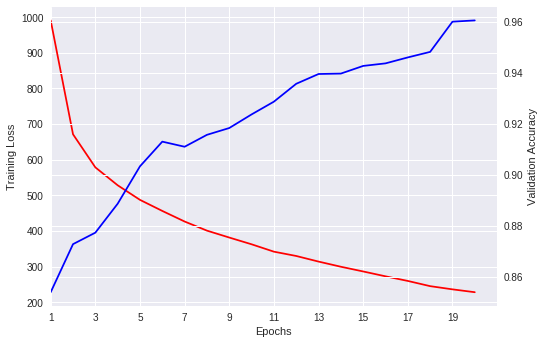

In [0]:
fig1, ax1 = plt.subplots()
ax1b = ax1.twinx()

ax1.plot(range(1, epochs+1), train_loss, 'r-')
ax1b.plot(range(1, epochs+1), valid_acc, 'b-')

ax1.set_xlim([1, epochs+1])
ax1.set_xticks(ticks = range(1, epochs+1,2))

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training Loss')
ax1b.set_ylabel('Validation Accuracy')

plt.show()

In [0]:
training_loss = train_loss
validation_accuracy = valid_acc

### Loading the saved model and training further

In [0]:
g = tf.Graph()

with g.as_default():
    
    build_cnn()
    
    saver = tf.train.Saver()


First convolution layer: 
<tf.Variable 'conv1/_weights:0' shape=(3, 3, 1, 64) dtype=float32_ref>
<tf.Variable 'conv1/_biases:0' shape=(64,) dtype=float32_ref>
Tensor("conv1/conv:0", shape=(?, 28, 28, 64), dtype=float32)
Tensor("conv1/bias_add:0", shape=(?, 28, 28, 64), dtype=float32)
Tensor("conv1/activation:0", shape=(?, 28, 28, 64), dtype=float32)

Second convolution layer: 
<tf.Variable 'conv2/_weights:0' shape=(5, 5, 64, 128) dtype=float32_ref>
<tf.Variable 'conv2/_biases:0' shape=(128,) dtype=float32_ref>
Tensor("conv2/conv:0", shape=(?, 10, 10, 128), dtype=float32)
Tensor("conv2/bias_add:0", shape=(?, 10, 10, 128), dtype=float32)
Tensor("conv2/activation:0", shape=(?, 10, 10, 128), dtype=float32)

First dense layer: 
<tf.Variable 'dense1/_weights:0' shape=(3200, 1024) dtype=float32_ref>
<tf.Variable 'dense1/_biases:0' shape=(1024,) dtype=float32_ref>
Tensor("dense1/dense_conn:0", shape=(?, 1024), dtype=float32)
Tensor("dense1/bias_add:0", shape=(?, 1024), dtype=float32)
Tensor("

In [0]:
epochs

20

In [0]:
with tf.Session(graph = g) as sess:
    
    epochs_2 = 20
    
    model_loader(session =  sess, saver = saver, epoch = epochs, path = './model')
    
    train_loss, valid_acc =  train(sess, training_data = [x_train_scaled, y_train], valid_train_split=0.1, 
                                    batch_size = 32, epochs=epochs_2, dropout_prob=0.5, initialize_var = False, 
                                    shuffle=True, random_seed = 10)
    
    predictions = predictions(session = sess, x_test_data = x_test_scaled, probabilities=False)
    
    

Loading saved model at epoch 20 from path ./model
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./model/cnn_model.ckpt-20
Training loss at the end of 1 epoch is 215.471
Validation data accuracy is 0.952
Training loss at the end of 2 epoch is 204.209
Validation data accuracy is 0.962
Training loss at the end of 3 epoch is 193.142
Validation data accuracy is 0.957
Training loss at the end of 4 epoch is 184.781
Validation data accuracy is 0.965
Training loss at the end of 5 epoch is 174.967
Validation data accuracy is 0.963
Training loss at the end of 6 epoch is 166.594
Validation data accuracy is 0.968
Training loss at the end of 7 epoch is 159.490
Validation data accuracy is 0.971
Training loss at the end of 8 epoch is 151.750
Validation data accuracy is 0.974
Training loss at the end of 9 epoch is 139.640
Validation data accuracy is 0.976
Training loss at the end of 10 epoch is 136.372
Validation data ac

In [0]:
test_data_acc = np.sum(y_test == predictions)
print('Test data accuracy after %d epochs: %.2f' %(epochs+epochs_2, test_data_acc*1.0/len(y_test)*100))

Test data accuracy after 40 epochs: 92.67


Even though the training loss decreased and validation data accuracy, the test data accuracy increased only marginally

In [0]:
training_loss = training_loss + train_loss
validation_accuracy = validation_accuracy + valid_acc

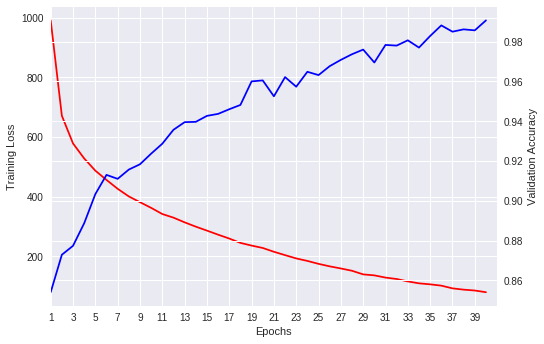

In [0]:
fig2, ax2 = plt.subplots()
ax2b = ax2.twinx()

ax2.plot(range(1, epochs + epochs_2+1), training_loss, 'r-')
ax2b.plot(range(1, epochs + epochs_2+1), validation_accuracy, 'b-')

ax2.set_xlim([1, epochs + epochs_2+1])
ax2.set_xticks(ticks = range(1, epochs + epochs_2+1,2))

ax2.set_xlabel('Epochs')
ax2.set_ylabel('Training Loss')
ax2b.set_ylabel('Validation Accuracy')

plt.show()